<a href="https://colab.research.google.com/github/Hinckley322/project/blob/main/td_akwaibom_(UPDATED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Layer
import tensorflow.keras.backend as K
import tensorflow as tf

In [2]:
# Load the uploaded dataset to analyze its structure
file_path = '/content/updated_akwa_ibom_tourism_duplicate.csv'
tourism_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tourism_data.head()

,Date,Total_arrival,Humidity,Events,Weather,Rainfall
0,2004-01,0,0.0,NaN,0,0.0
1,2004-01,0,0.0,NaN,0,0.0
2,2004-01,0,0.0,NaN,0,0.0
3,2004-01,0,0.0,NaN,0,0.0
4,2004-01,0,0.0,NaN,0,0.0


In [3]:
tourism_data

,Date,Total_arrival,Humidity,Events,Weather,Rainfall
0,2004-01,0,0.0,NaN,0,0.0
1,2004-01,0,0.0,NaN,0,0.0
2,2004-01,0,0.0,NaN,0,0.0
3,2004-01,0,0.0,NaN,0,0.0
4,2004-01,0,0.0,NaN,0,0.0
...,...,...,...,...,...,...
4027,2024-12,0,0.0,NaN,0,0.0
4028,2024-12,0,0.0,NaN,0,0.0
4029,2024-12,0,0.0,NaN,0,0.0
4030,2024-12,0,0.0,NaN,0,0.0


In [4]:
tourism_data.isna().sum()

,0
Date,0
Total_arrival,0
Humidity,0
Events,496
Weather,0
Rainfall,0


In [5]:
tourism_data.dropna(inplace=True)

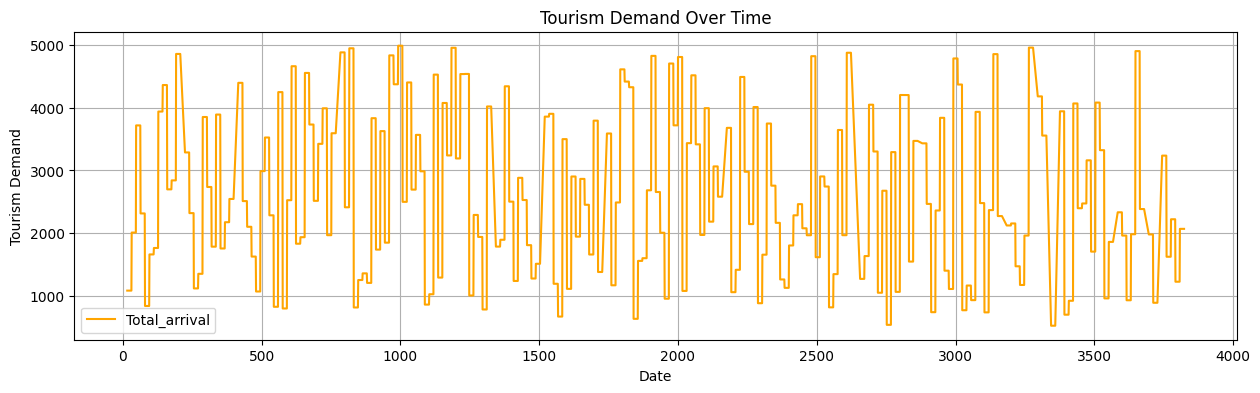

In [6]:
plt.figure(figsize=(15, 4))
plt.plot(tourism_data.index, tourism_data['Total_arrival'], label='Total_arrival', color='orange')
plt.title('Tourism Demand Over Time')
plt.ylabel('Tourism Demand')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Convert 'Date' to datetime
tourism_data['Date'] = pd.to_datetime(tourism_data['Date'])

# Extract year and month for further analysis
tourism_data['Year'] = tourism_data['Date'].dt.year
tourism_data['Month'] = tourism_data['Date'].dt.month

# Set Date as the index for time-series plots
tourism_data.set_index('Date', inplace=True)

In [8]:
avg_demand_per_year = tourism_data.groupby('Year')['Total_arrival'].mean()
avg_demand_per_year.head(5)

,Total_arrival
Year,
2004,2476.000000
2005,2648.727273
2006,2557.454545
2007,2961.666667
2008,2539.000000


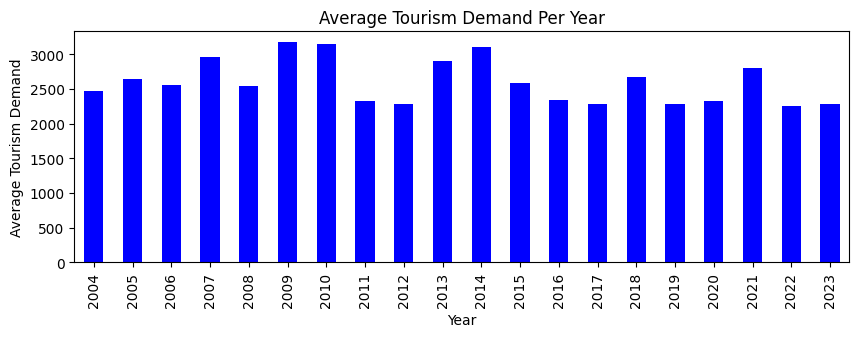

In [9]:
avg_demand_per_year = tourism_data.groupby('Year')['Total_arrival'].mean()
plt.figure(figsize=(10, 3))
avg_demand_per_year.plot(kind='bar', color='blue')
plt.title('Average Tourism Demand Per Year')
plt.ylabel('Average Tourism Demand')
plt.xlabel('Year')
plt.show()

In [10]:
# Calculate the average tourism demand per year
avg_demand_per_year = tourism_data.groupby('Year')['Total_arrival'].mean()

# Convert the result into a DataFrame for better formatting
avg_demand_table = avg_demand_per_year.reset_index()
avg_demand_table.columns = ['Year', 'Average_Tourism_Demand']

# Save the table to a CSV file
output_file = "average_tourism_demand_per_year.csv"
avg_demand_table.to_csv(output_file, index=False)

# Print a confirmation message
print(f"Table of averages saved to {output_file}")

Table of averages saved to average_tourism_demand_per_year.csv


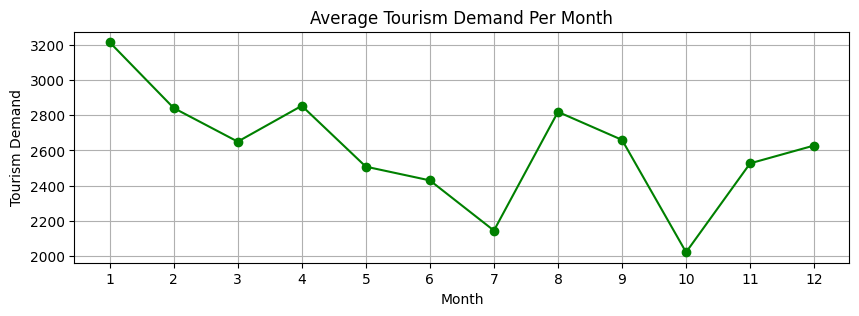

In [11]:
avg_demand_per_month = tourism_data.groupby('Month')['Total_arrival'].mean()
plt.figure(figsize=(10, 3))
avg_demand_per_month.plot(kind='line', marker='o', color='green')
plt.title('Average Tourism Demand Per Month')
plt.ylabel('Tourism Demand')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

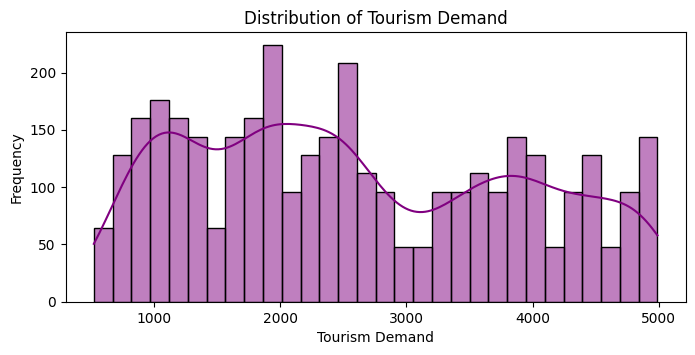

In [12]:
plt.figure(figsize=(8, 3.5))
sns.histplot(tourism_data['Total_arrival'], kde=True, bins=30, color='purple')
plt.title('Distribution of Tourism Demand')
plt.xlabel('Tourism Demand')
plt.ylabel('Frequency')
plt.show()

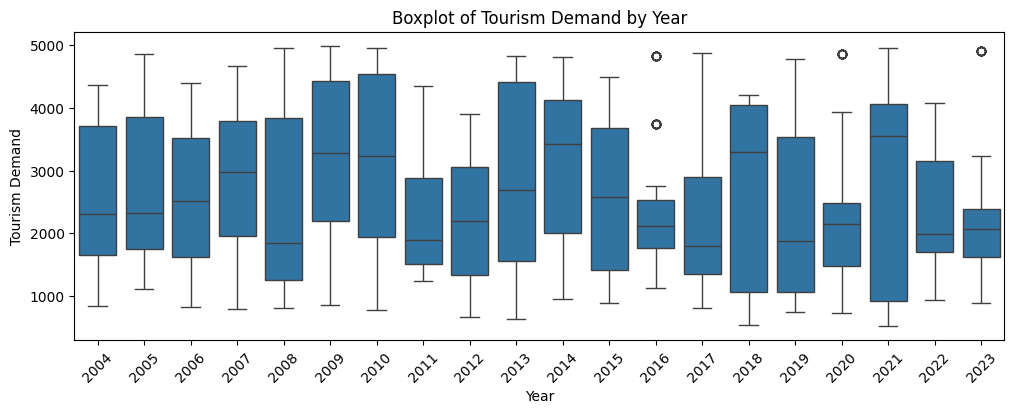

In [13]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Year', y='Total_arrival', data=tourism_data)
plt.title('Boxplot of Tourism Demand by Year')
plt.ylabel('Tourism Demand')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

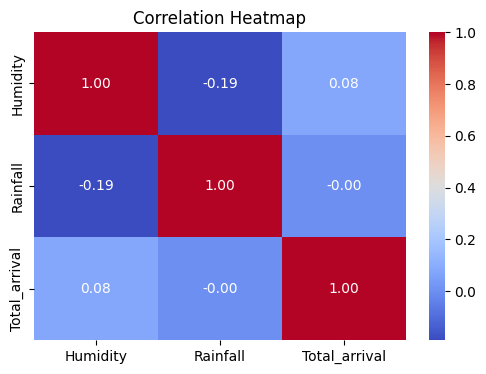

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(tourism_data[['Humidity', 'Rainfall','Total_arrival']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Group by year and sum the 'Tourism_Demand' (number of visitors)
visitors_per_year = tourism_data.groupby('Year')['Total_arrival'].sum()

# Generate a table of visitors per year
print(visitors_per_year)

Year
2004    435776
2005    466176
2006    450112
2007    568640
2008    446864
2009    609008
2010    553360
2011    410144
2012    438128
2013    510608
2014    596336
2015    455968
2016    450224
2017    365248
2018    470400
2019    438080
2020    408560
2021    404096
2022    396448
2023    328592
Name: Total_arrival, dtype: int64


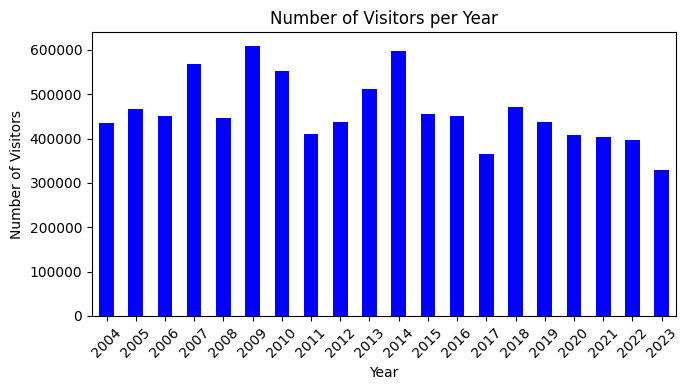

In [16]:
# Plot the number of visitors against year
plt.figure(figsize=(7, 4))
visitors_per_year.plot(kind='bar', color='blue')
plt.title('Number of Visitors per Year')
plt.ylabel('Number of Visitors')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
tourism_data

,Total_arrival,Humidity,Events,Weather,Rainfall,Year,Month
Date,,,,,,,
2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.00,2004,2
2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.00,2004,2
2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.00,2004,2
2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.00,2004,2
2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.00,2004,2
...,...,...,...,...,...,...,...
2023-11-01,2069,67.26,Ibeno Beach,Cloudy,126.42,2023,11
2023-11-01,2069,67.26,Ibeno Beach,Cloudy,126.42,2023,11
2023-11-01,2069,67.26,Ibeno Beach,Cloudy,126.42,2023,11


In [18]:
# Reset the index and restore 'Date' as a column
tourism_data.reset_index(inplace=True)

# Display the first few rows to confirm changes
tourism_data.head()


,Date,Total_arrival,Humidity,Events,Weather,Rainfall,Year,Month
0,2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.0,2004,2
1,2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.0,2004,2
2,2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.0,2004,2
3,2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.0,2004,2
4,2004-02-01,1084,95.03,Ibeno Beach,Cloudy,23.0,2004,2


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# Convert Date column to datetime and sort by date
tourism_data['Date'] = pd.to_datetime(tourism_data['Date'])
tourism_data = tourism_data.sort_values('Date')

# Ordinal encode categorical columns (Events, Weather)
ordinal_encoder = OrdinalEncoder()
tourism_data[['Events', 'Weather']] = ordinal_encoder.fit_transform(tourism_data[['Events', 'Weather']])

# Select relevant columns and normalize numerical features
features = ['Humidity', 'Rainfall', 'Events', 'Weather']
target = 'Total_arrival'

In [20]:
# Retrieve the mapping for each encoded column
for col, categories in zip(['Events', 'Weather'], ordinal_encoder.categories_):
    print(f"{col}:")
    for index, category in enumerate(categories):
        print(f"  {index} -> {category}")


Events:
  0 -> 9999 Carol Night
  1 -> Ekpo Display
  2 -> Ibaka
  3 -> Ibeno Beach
  4 -> Ibom Food Fest
  5 -> Local Sports Event
Weather:
  0 -> Cloudy
  1 -> Rainy
  2 -> Stormy
  3 -> Sunny


In [21]:
# Save the cleaned dataset to a CSV file
tourism_data.to_csv("cleaned_tourism_data.csv", index=False)

In [22]:
# Normalize features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

tourism_data[features] = scaler_features.fit_transform(tourism_data[features])
tourism_data[target] = scaler_target.fit_transform(tourism_data[[target]])

# Machine Learning

In [23]:
# Prepare data for time series modeling
def create_time_series_data(data, time_steps=12):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

# Convert the dataframe to a numpy array for LSTM processing
time_steps = 12  # Use the past 12 months to predict the next month
data = tourism_data[features + [target]].values
X, y = create_time_series_data(data, time_steps)

# Split the data into training and testing sets (75% train, 25% test)
split = int(0.75 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [24]:
import tensorflow as tf

# Register the custom layer
@tf.keras.utils.register_keras_serializable(package="Custom")
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.attention_dense = tf.keras.layers.Dense(1, activation="tanh")

    def call(self, inputs):
        attention_scores = self.attention_dense(inputs)
        attention_weights = tf.nn.softmax(attention_scores, axis=1)
        context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
        return context_vector

def build_lstm_attention_model(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    lstm_out = tf.keras.layers.LSTM(50, return_sequences=True)(inputs)
    context_vector = AttentionLayer()(lstm_out)
    output = tf.keras.layers.Dense(1)(context_vector)
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
    return model

# Build and train the LSTM + Attention model
input_shape = X_train.shape[1:]  # Assuming X_train is already defined
lstm_attention_model = build_lstm_attention_model(input_shape)

history_attention = lstm_attention_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32, verbose=1
)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1639 - mae: 0.3291 - mse: 0.1639 - val_loss: 0.0887 - val_mae: 0.2502 - val_mse: 0.0887
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0815 - mae: 0.2431 - mse: 0.0815 - val_loss: 0.0870 - val_mae: 0.2488 - val_mse: 0.0870
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0785 - mae: 0.2379 - mse: 0.0785 - val_loss: 0.0853 - val_mae: 0.2437 - val_mse: 0.0853
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0811 - mae: 0.2446 - mse: 0.0811 - val_loss: 0.0916 - val_mae: 0.2621 - val_mse: 0.0916
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0770 - mae: 0.2409 - mse: 0.0770 - val_loss: 0.0873 - val_mae: 0.2508 - val_mse: 0.0873
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0776 - mae: 0.2406 - mse: 0.0776 - val_loss: 0.0893 - val_mae: 0.2590 - val_mse: 0.0893
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0791 - mae: 0.2434 - mse: 0.0791 - val_loss: 0

In [25]:
# Predictions and Metrics
y_pred = lstm_attention_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("LSTM + Attention Model:")
print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
LSTM + Attention Model:
  MSE: 0.1235
  MAE: 0.2912


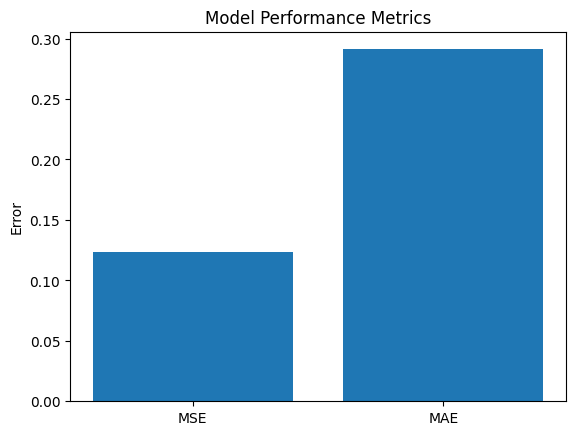

In [26]:
# Plot metrics as a bar chart
import matplotlib.pyplot as plt

metrics = {'MSE': mse, 'MAE': mae}
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performance Metrics')
plt.ylabel('Error')
plt.show()


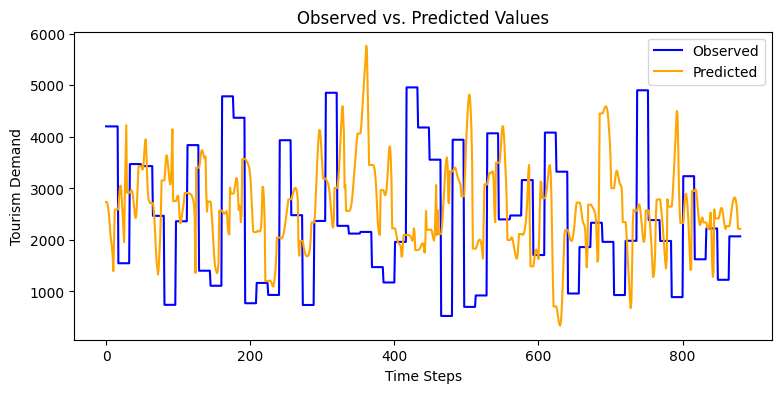

In [27]:
# Inverse transform the scaled data to original scale
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler_target.inverse_transform(y_pred)

# Plot observed vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))
plt.plot(y_test_original, label='Observed', color='blue')
plt.plot(y_pred_original, label='Predicted', color='orange')
plt.title('Observed vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Tourism Demand')
plt.legend()
plt.show()


In [28]:
# Forecast next 10 months
last_sequence = data[-time_steps:, :-1]  # Last observed sequence
predictions = []
for _ in range(10):
    pred_scaled = lstm_attention_model.predict(last_sequence[np.newaxis, :, :])
    pred_original = scaler_target.inverse_transform(pred_scaled)
    predictions.append(pred_original[0, 0])

    # Update last_sequence with the new prediction
    last_sequence = np.roll(last_sequence, shift=-1, axis=0)
    last_sequence[-1, -1] = pred_scaled[0, 0]

print("Forecast for the next 10 months:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Forecast for the next 10 months: [2216.258, 2231.2139, 2243.1838, 2249.936, 2244.685, 2214.461, 2154.352, 2068.3674, 1959.5743, 1837.2172]
